In [1]:
#Импортируем все данные
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
#Загружаем набор данных в DataFrame
data = pd.read_csv("houses_to_rent.csv")

In [3]:
data

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,6075,1,50,2,1,1,2,acept,not furnished,R$420,"R$1,150",R$0,R$15,"R$1,585"
6076,6076,1,84,2,2,1,16,not acept,furnished,R$768,"R$2,900",R$63,R$37,"R$3,768"
6077,6077,0,48,1,1,0,13,acept,not furnished,R$250,R$950,R$42,R$13,"R$1,255"
6078,6078,1,160,3,2,2,-,not acept,not furnished,R$0,"R$3,500",R$250,R$53,"R$3,803"


In [4]:
pd_data = data.copy()
pd_data.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
pd_data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [6]:
#Обзор набора данных
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            6080 non-null   int64 
 1   area            6080 non-null   int64 
 2   rooms           6080 non-null   int64 
 3   bathroom        6080 non-null   int64 
 4   parking spaces  6080 non-null   int64 
 5   floor           6080 non-null   object
 6   animal          6080 non-null   object
 7   furniture       6080 non-null   object
 8   hoa             6080 non-null   object
 9   rent amount     6080 non-null   object
 10  property tax    6080 non-null   object
 11  fire insurance  6080 non-null   object
 12  total           6080 non-null   object
dtypes: int64(5), object(8)
memory usage: 617.6+ KB


In [7]:
#Общие статистические характеристики
pd_data.describe()

,city,area,rooms,bathroom,parking spaces
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,0.863322,151.143914,2.492599,2.341612,1.756250
std,0.343535,375.559485,1.129665,1.438860,1.611909
min,0.000000,10.000000,1.000000,1.000000,0.000000
25%,1.000000,58.000000,2.000000,1.000000,1.000000
50%,1.000000,100.000000,3.000000,2.000000,1.000000
75%,1.000000,200.000000,3.000000,3.000000,2.000000
max,1.000000,24606.000000,10.000000,10.000000,12.000000


In [8]:
#Обработка пропущенных значений
pd_data.isnull().sum()

city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent amount       0
property tax      0
fire insurance    0
total             0
dtype: int64

Мы преобразуем все данные в числовой формат, чтобы облегчить анализ

In [9]:
pd_data["floor"] = pd_data["floor"].replace("-", 0)
pd_data['floor'] = pd_data['floor'].astype(int)

pd_data["animal"] = pd_data["animal"].replace("acept", 1)
pd_data["animal"] = pd_data["animal"].replace("not acept", 0)
pd_data['animal'] = pd_data['animal'].astype(int)

pd_data["furniture"] = pd_data["furniture"].replace("furnished", 1)
pd_data["furniture"] = pd_data["furniture"].replace("not furnished", 0)
pd_data['furniture'] = pd_data['furniture'].astype(int)

In [10]:
pd_data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,1,1,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,1,0,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,1,1,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,1,0,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,0,0,0,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [11]:
pd_data["hoa"]

0           R$0
1         R$540
2       R$4,172
3         R$700
4           R$0
         ...   
6075      R$420
6076      R$768
6077      R$250
6078        R$0
6079      R$489
Name: hoa, Length: 6080, dtype: object

In [12]:
contains_incluso = pd_data["hoa"].str.contains("Incluso") 
contains_incluso.value_counts()

False    5997
True       83
Name: hoa, dtype: int64

In [13]:
contains_incluso = pd_data["hoa"].str.contains("Sem info") 
contains_incluso.value_counts()

False    5961
True      119
Name: hoa, dtype: int64

In [ ]:
#pd.DataFrame.apply(lambda x: -1 if x == 'No info' else x)

In [14]:
pd_data["hoa"] = pd_data["hoa"].replace(['Sem info', 'Incluso'], np.nan)
pd_data["hoa"] = pd_data["hoa"].str.replace("R\$", "").str.replace(",", "")
pd_data["hoa"] = pd.to_numeric(pd_data["hoa"], errors='coerce')

mean_hoa = pd_data["hoa"].mean()
pd_data["hoa"].fillna(mean_hoa, inplace=True)

pd_data["hoa"] = pd_data["hoa"].astype(int)

In [15]:
pd_data["rent amount"] = pd_data["rent amount"].str.replace("R\$", "").str.replace(",", "")
pd_data["rent amount"] = pd.to_numeric(pd_data["rent amount"], errors='coerce')
pd_data["rent amount"] = pd_data["rent amount"].astype(int)

In [16]:
pd_data["property tax"]=pd_data["property tax"].replace(['Sem info', 'Incluso'], np.nan)
pd_data["property tax"] = pd_data["property tax"].str.replace("R\$", "").str.replace(",", "")
pd_data["property tax"] = pd.to_numeric(pd_data["property tax"], errors='coerce')

mean_property = pd_data["property tax"].mean()
pd_data["property tax"].fillna(mean_property, inplace=True)

pd_data["property tax"] = pd_data["property tax"].astype(int)

In [17]:
pd_data["fire insurance"] = pd_data["fire insurance"].str.replace("R\$", "").str.replace(",", "")
pd_data["fire insurance"] = pd.to_numeric(pd_data["fire insurance"], errors='coerce')
pd_data["fire insurance"] = pd_data["fire insurance"].astype(int)

In [18]:
pd_data["total"] = pd_data["total"].str.replace("R\$", "").str.replace(",", "")
pd_data["total"] = pd.to_numeric(pd_data["total"], errors='coerce')
pd_data["total"] = pd_data["total"].astype(int)

In [19]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   city            6080 non-null   int64
 1   area            6080 non-null   int64
 2   rooms           6080 non-null   int64
 3   bathroom        6080 non-null   int64
 4   parking spaces  6080 non-null   int64
 5   floor           6080 non-null   int32
 6   animal          6080 non-null   int32
 7   furniture       6080 non-null   int32
 8   hoa             6080 non-null   int32
 9   rent amount     6080 non-null   int32
 10  property tax    6080 non-null   int32
 11  fire insurance  6080 non-null   int32
 12  total           6080 non-null   int32
dtypes: int32(8), int64(5)
memory usage: 427.6 KB


In [20]:
#Общие статистические характеристики
pd_data.describe()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,0.863322,151.143914,2.492599,2.341612,1.756250,5.672204,0.767434,0.260197,1125.803125,4395.844408,492.518257,58.204276,6033.194572
std,0.343535,375.559485,1.129665,1.438860,1.611909,6.168918,0.422502,0.438778,3976.240700,3576.668946,6212.478211,49.313441,8751.347700
min,0.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,1.000000,58.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,260.000000,1800.000000,34.000000,23.000000,2451.500000
50%,1.000000,100.000000,3.000000,2.000000,1.000000,4.000000,1.000000,0.000000,710.000000,3111.000000,150.000000,41.000000,4128.500000
75%,1.000000,200.000000,3.000000,3.000000,2.000000,9.000000,1.000000,1.000000,1436.000000,5952.500000,459.000000,77.000000,8074.000000
max,1.000000,24606.000000,10.000000,10.000000,12.000000,99.000000,1.000000,1.000000,220000.000000,45000.000000,366300.000000,677.000000,372700.000000


In [21]:
pd_data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,1,1,0,8000,1000,121,9121
1,0,64,2,1,1,10,1,0,540,820,122,11,1493
2,1,443,5,5,4,3,1,1,4172,7000,1417,89,12680
3,1,73,2,2,1,12,1,0,700,1250,150,16,2116
4,1,19,1,1,0,0,0,0,0,1200,41,16,1257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,1,50,2,1,1,2,1,0,420,1150,0,15,1585
6076,1,84,2,2,1,16,0,1,768,2900,63,37,3768
6077,0,48,1,1,0,13,1,0,250,950,42,13,1255
6078,1,160,3,2,2,0,0,0,0,3500,250,53,3803


'В ходе анализа ассоциаций домовладельцев, арендной платы, налога на недвижимость и страховки от пожара были обнаружены следующие ключевые моменты. Ассоциации домовладельцев: Большая часть ассоциаций домовладельцев (в диапазоне от 0 до 300000) сконцентрирована в интервале от 0 до 25000.Также было выявлено небольшое количество ассоциаций, которые превышают этот диапазон и достигают значения в 250000. Арендная плата: Основная масса арендных платежей (в диапазоне от 0 до 40000) распределена в интервале от 0 до 20000. Налог на недвижимость: Большая часть налогов на недвижимость (в диапазоне от 0 до 400000) сконцентрирована в пределах 0 и 350000, с небольшим количеством значений в окрестности 400000. Страховка от пожара: Основная масса страховых выплат (в диапазоне от 0 до 600) находится в интервале от 0 до 200. Общий анализ позволяет сделать вывод, что в данных присутствуют как стандартные значения, так и редкие выбросы. Эти отклонения могут иметь различные причины, такие как особенности о

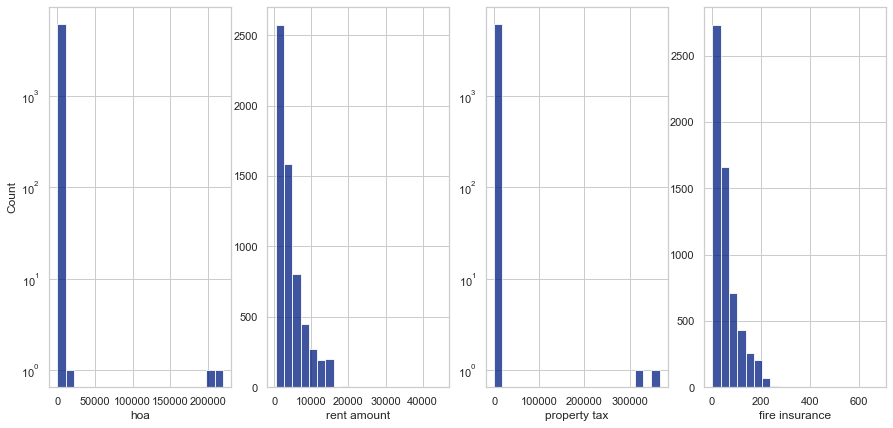

In [64]:
#Гистограммы для распределений числовых переменных
def hist_plot(data):
    plt.figure(figsize=(15,7))
    
    sns.set(style='whitegrid')
    sns.set_palette('dark')

    plt.subplot(1,4,1)
    sns.histplot(data['hoa'], bins=20, log_scale=(False, True)) 
    
    plt.subplot(1,4,2)
    sns.histplot(data['rent amount'], bins=20)
    plt.ylabel('')
    
    plt.subplot(1,4,3)
    sns.histplot(data['property tax'], bins=20, log_scale=(False, True)) 
    plt.ylabel('')
    
    plt.subplot(1,4,4)
    sns.histplot(data['fire insurance'], bins=20) 
    plt.ylabel('')
    
hist_plot(pd_data)

'''В ходе анализа ассоциаций домовладельцев, арендной платы, налога на недвижимость и страховки от пожара были обнаружены следующие ключевые моменты. Ассоциации домовладельцев: Большая часть ассоциаций домовладельцев (в диапазоне от 0 до 300000) сконцентрирована в интервале от 0 до 25000.Также было выявлено небольшое количество ассоциаций, которые превышают этот диапазон и достигают значения в 250000. Арендная плата: Основная масса арендных платежей (в диапазоне от 0 до 40000) распределена в интервале от 0 до 20000. Налог на недвижимость: Большая часть налогов на недвижимость (в диапазоне от 0 до 400000) сконцентрирована в пределах 0 и 350000, с небольшим количеством значений в окрестности 400000. Страховка от пожара: Основная масса страховых выплат (в диапазоне от 0 до 600) находится в интервале от 0 до 200. Общий анализ позволяет сделать вывод, что в данных присутствуют как стандартные значения, так и редкие выбросы. Эти отклонения могут иметь различные причины, такие как особенности объектов недвижимости, расположение, размер и другие факторы.'''

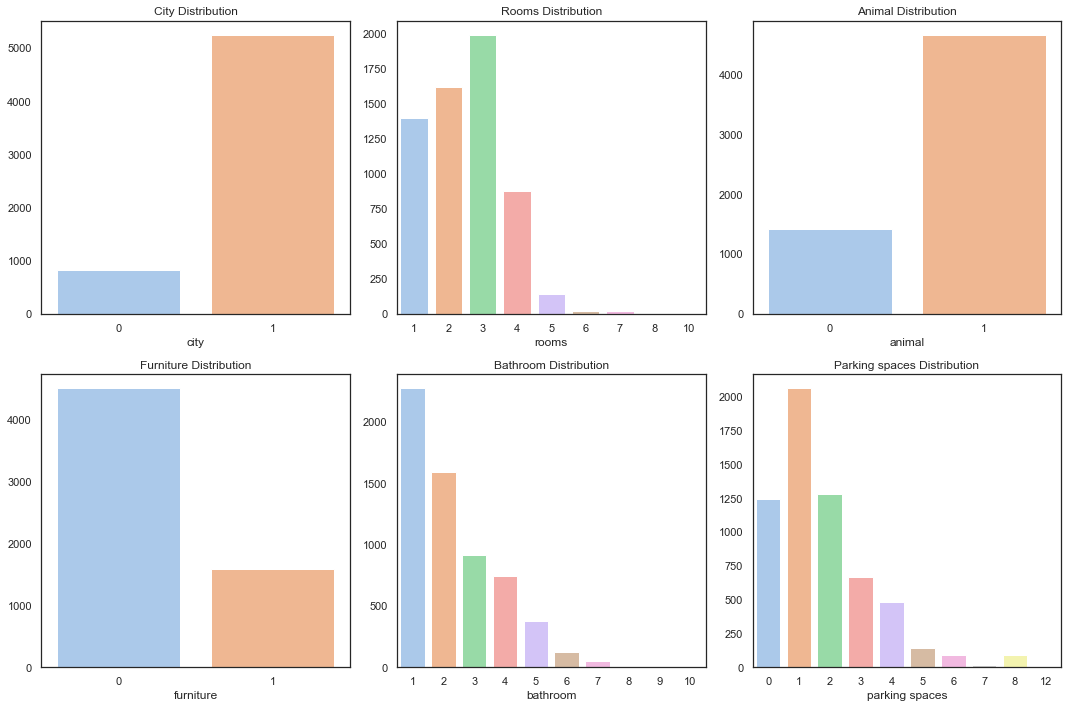

In [62]:
def count_plot(data):
    plt.figure(figsize=(15,10))
    
    sns.set(style='white')
    sns.set_palette('pastel')

    plt.subplot(2, 3, 1)
    sns.countplot(data=data, x='city')
    plt.ylabel('')
    plt.title('City Distribution')

    plt.subplot(2, 3, 2)
    sns.countplot(data=data, x='rooms')
    plt.ylabel('')
    plt.title('Rooms Distribution')
    
    plt.subplot(2, 3, 3)
    sns.countplot(data=data, x='animal')
    plt.ylabel('')
    plt.title('Animal Distribution')

    plt.subplot(2, 3, 4)
    sns.countplot(data=data, x='furniture')
    plt.ylabel('')
    plt.title('Furniture Distribution')
    
    plt.subplot(2, 3, 5)
    sns.countplot(data=data, x='bathroom')
    plt.ylabel('')
    plt.title('Bathroom Distribution')
    
    plt.subplot(2, 3, 6)
    sns.countplot(data=data, x='parking spaces')
    plt.ylabel('')
    plt.title('Parking spaces Distribution')
    
    plt.tight_layout()
    plt.show()

count_plot(pd_data)

'Диапазон значений для "Площади" составляет от 0 до 25000, а для "Арендной платы" — от 0 до 40000. Основная масса точек на графике сконцентрирована в узком диапазоне по обеим осям: "Площадь" до 1000 и "Арендная плата" до 15000. Наблюдаются значительные выбросы, которые значительно удалены от этой области концентрации. Этот анализ позволяет сделать вывод о наличии двух ярко выраженных групп точек на графике. Одна группа представлена основной массой данных, где площадь объектов недвижимости невелика, и арендная плата также остается в пределах относительно низких значений. Вторая группа включает в себя выбросы с более высокими значениями как по площади, так и по арендной плате.Этот анализ позволяет сделать вывод о наличии двух ярко выраженных групп точек на графике. Одна группа представлена основной массой данных, где площадь объектов недвижимости невелика, и арендная плата также остается в пределах относительно низких значений. Вторая группа включает в себя выбросы с более высокими значе

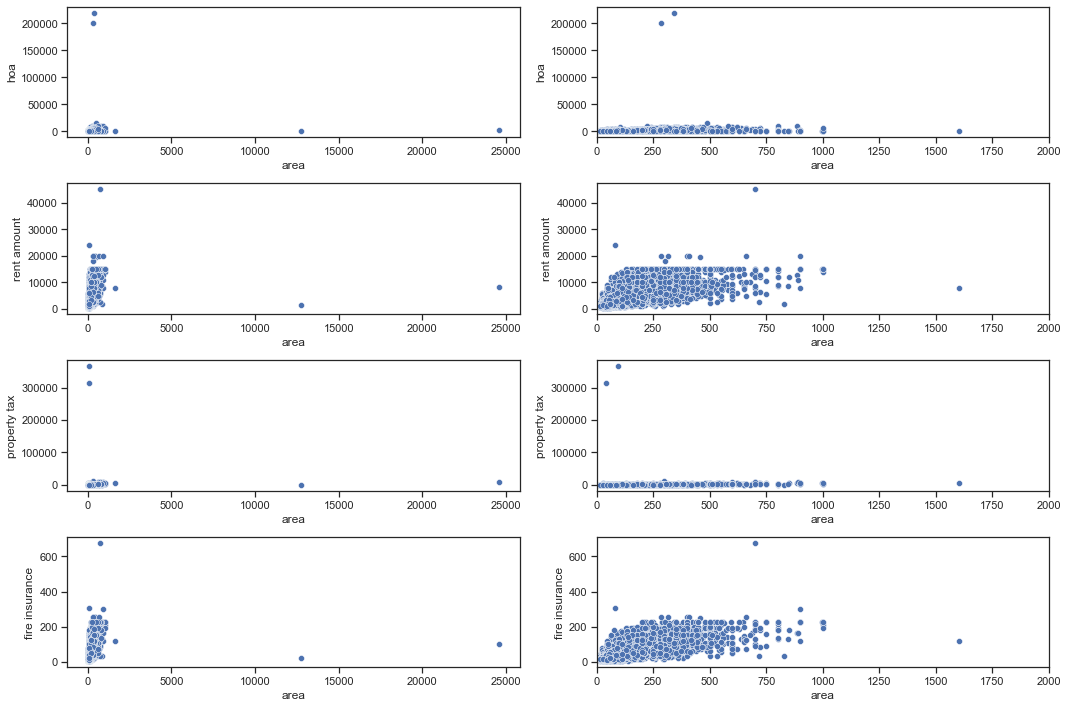

In [65]:
def line_plot(data):
    plt.figure(figsize=(15,10))
    
    plt.subplot(4,2,1)
    sns.scatterplot(data=data, x='area', y='hoa') 
    
    plt.subplot(4,2,2)
    sns.scatterplot(data=data, x='area', y='hoa') 
    plt.xlim(0,2000)
    
    plt.subplot(4,2,3)
    sns.scatterplot(data=data, x='area', y='rent amount')
    
    plt.subplot(4,2,4)
    sns.scatterplot(data=data, x='area', y='rent amount')
    plt.xlim(0,2000)
    
    plt.subplot(4,2,5)
    sns.scatterplot(data=data, x='area', y='property tax') 
    
    plt.subplot(4,2,6)
    sns.scatterplot(data=data, x='area', y='property tax') 
    plt.xlim(0,2000)
    
    plt.subplot(4,2,7)
    sns.scatterplot(data=data, x='area', y='fire insurance') 
    
    plt.subplot(4,2,8)
    sns.scatterplot(data=data, x='area', y='fire insurance') 
    plt.xlim(0,2000)
    
    
    plt.tight_layout()
    
line_plot(pd_data)
'''Диапазон значений для "Площади" составляет от 0 до 25000, а для "Арендной платы" — от 0 до 40000. Основная масса точек на графике сконцентрирована в узком диапазоне по обеим осям: "Площадь" до 1000 и "Арендная плата" до 15000. Наблюдаются значительные выбросы, которые значительно удалены от этой области концентрации. Этот анализ позволяет сделать вывод о наличии двух ярко выраженных групп точек на графике. Одна группа представлена основной массой данных, где площадь объектов недвижимости невелика, и арендная плата также остается в пределах относительно низких значений. Вторая группа включает в себя выбросы с более высокими значениями как по площади, так и по арендной плате.Этот анализ позволяет сделать вывод о наличии двух ярко выраженных групп точек на графике. Одна группа представлена основной массой данных, где площадь объектов недвижимости невелика, и арендная плата также остается в пределах относительно низких значений. Вторая группа включает в себя выбросы с более высокими значениями как по площади, так и по арендной плате.'''

'Рассмотрим матрицу корреляций. При увеличении площади объекта недвижимости наблюдается небольшое увеличение арендной платы и страховки от пожара. Эта связь не является очень сильной или прямой, что говорит о возможности наличия других факторов, влияющих на эти переменные. Размер и количество комнат, ванных комнат и парковок влияют на ценовую политику аренды и на необходимость страховки. Увеличение количества комнат также связано с увеличением ванных комнат и парковок. Это может указывать на типичные требования и характеристики недвижимости с разным количеством комнат. Этажи, животные и мебель имеют меньшее влияние на ценовую динамику аренды и другие платежи.'

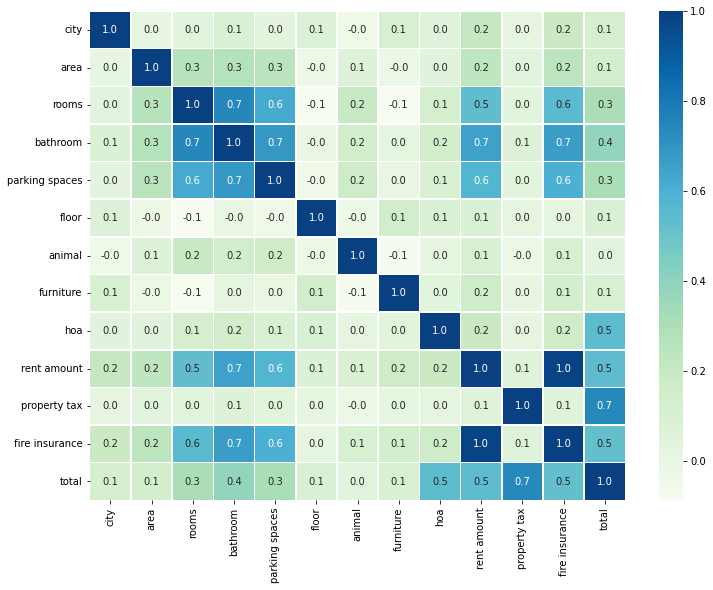

In [48]:
plt.figure(figsize=(12,9))
sns.heatmap(pd_data.corr(), annot=True, linewidths=.6, fmt='.1f', cmap = "GnBu");
'''Рассмотрим матрицу корреляций. При увеличении площади объекта недвижимости наблюдается небольшое увеличение арендной платы и страховки от пожара. Эта связь не является очень сильной или прямой, что говорит о возможности наличия других факторов, влияющих на эти переменные. Размер и количество комнат, ванных комнат и парковок влияют на ценовую политику аренды и на необходимость страховки. Увеличение количества комнат также связано с увеличением ванных комнат и парковок. Это может указывать на типичные требования и характеристики недвижимости с разным количеством комнат. Этажи, животные и мебель имеют меньшее влияние на ценовую динамику аренды и другие платежи.'''

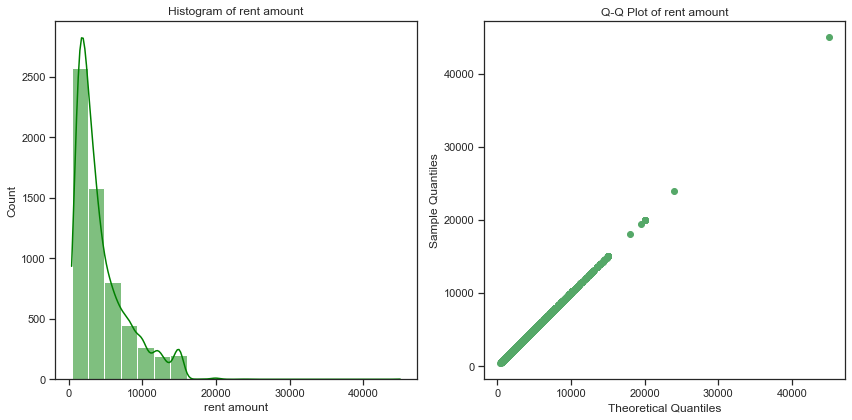

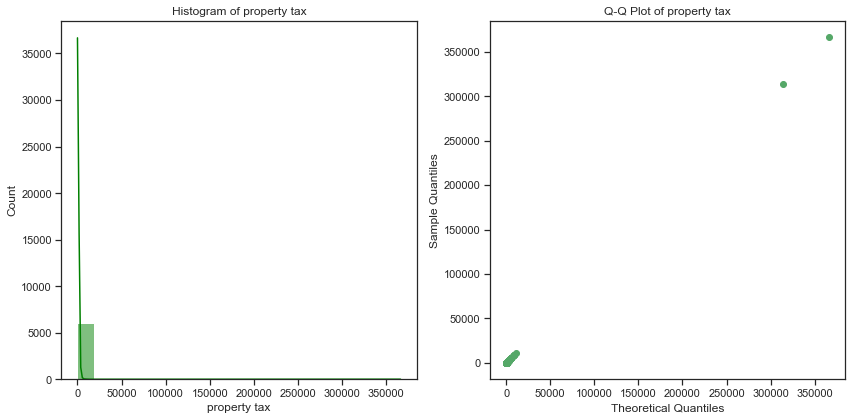

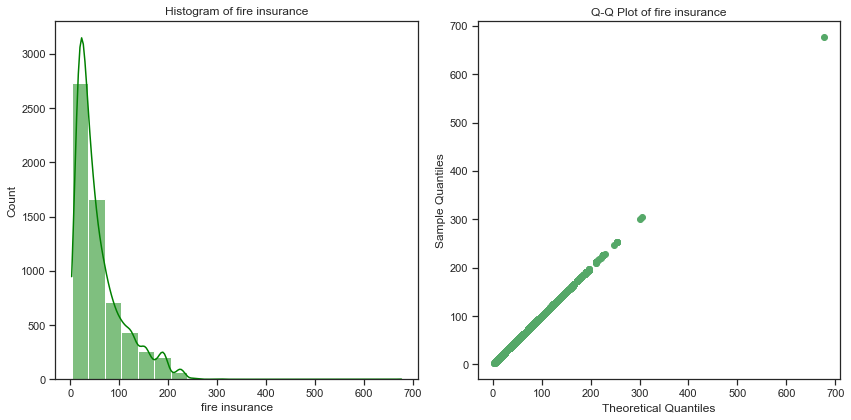

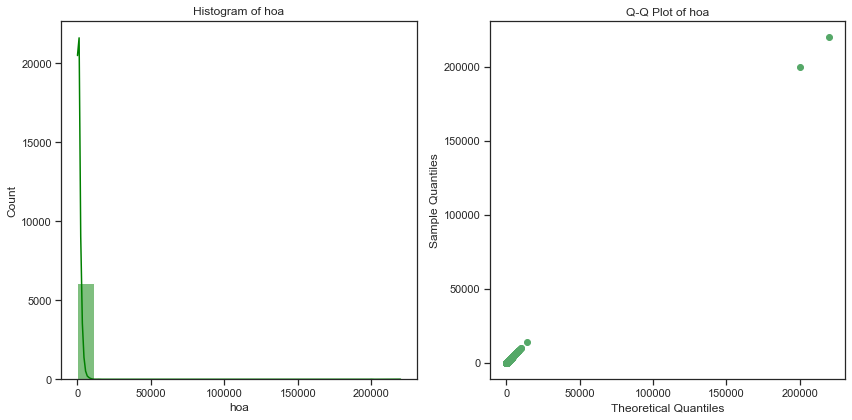

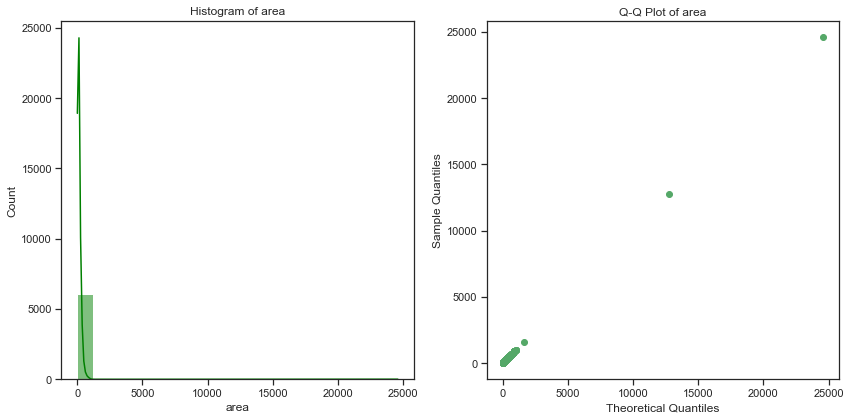

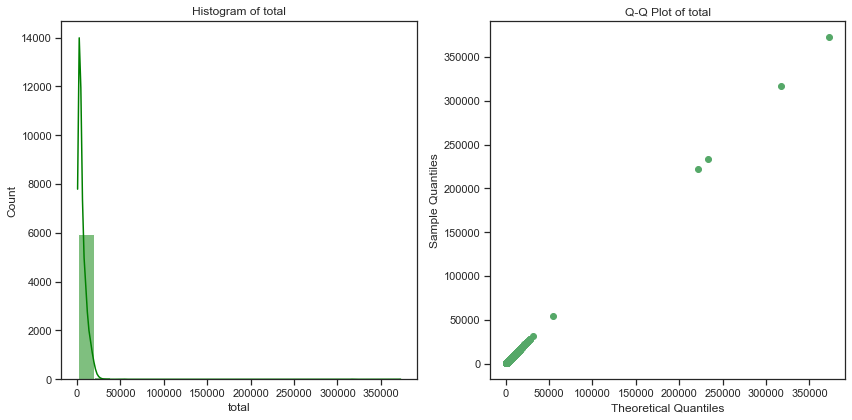

'Анализ распределений. Графики QQ для проверки нормальности. Стоит отметить, что графики QQ — это способ визуально проверить, соответствует ли набор данных нормальному распределению. Мы видим, что гистограммы совсем не похожи на кривую нормального распределения, что ясно указывает на то, что все данные не следуют нормальному распределению.'

In [76]:
def qq_data(data):
    
    sns.set_palette('colorblind')
    
    numeric_columns = data[['rent amount', 'property tax', 'fire insurance', 'hoa', 'area', 'total']]

    for column in numeric_columns:
        plt.figure(figsize=(12, 6))
    
    # Гистограмма
        plt.subplot(1, 2, 1)
        sns.histplot(data[column], bins=20, kde=True, color='green')
        plt.title(f'Histogram of {column}')
    
    # График Q-Q
        plt.subplot(1, 2, 2)
        sorted_data = np.sort(data[column])
        theoretical_quantiles = np.percentile(sorted_data, np.linspace(0, 100, len(sorted_data))) #np.percentile для вычисления квантилей
        plt.plot(theoretical_quantiles, sorted_data, marker='o', linestyle='none', c='g')
        plt.xlabel('Theoretical Quantiles')
        plt.ylabel('Sample Quantiles')
        plt.title(f'Q-Q Plot of {column}')
      
        plt.tight_layout()
        plt.show()

qq_data(pd_data)

'''Анализ распределений. Графики QQ для проверки нормальности. Стоит отметить, что графики QQ — это способ визуально проверить, соответствует ли набор данных нормальному распределению. Мы видим, что гистограммы совсем не похожи на кривую нормального распределения, что ясно указывает на то, что все данные не следуют нормальному распределению.'''

animal
0    3768.856436
1    4585.848907
Name: rent amount, dtype: float64


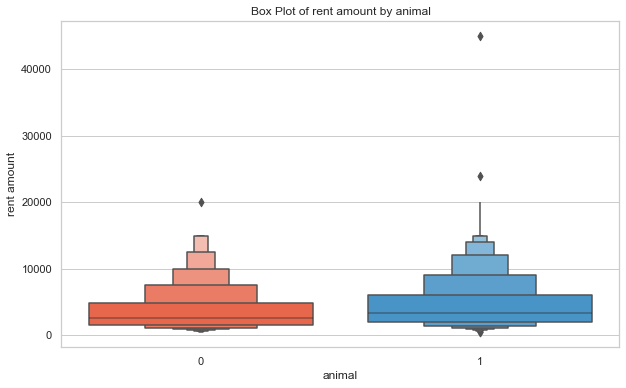

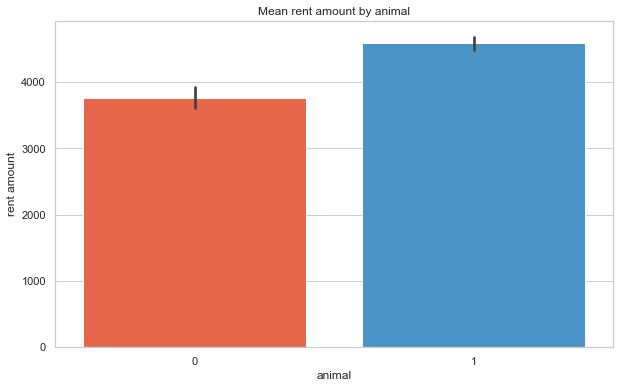

'Анализ категориальных переменных. Предположим, столбец animal, который указывает на наличие или отсутствие животных, и столбец rent amount, который представляет собой стоимость аренды. Наблюдение говорит о том, что наличие животных может быть одним из факторов, влияющих на стоимость аренды. Вероятно, владельцы жилья могут взимать более высокую арендную плату за жильё, где допускается проживание с животными, из-за потенциальных дополнительных затрат на уход за недвижимостью после животных.'

In [77]:
def categorical_data(data):
    category_mean = data.groupby('animal')['rent amount'].mean()
    print(category_mean)
    
    sns.set(style='whitegrid')
    custom_palette = ["#FF5733", "#3498DB", "#27AE60"]
    sns.set_palette(custom_palette)
    
    plt.figure(figsize=(10, 6))
    sns.boxenplot(x='animal', y='rent amount', data=data)
    plt.title('Box Plot of rent amount by animal')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='animal', y='rent amount', data=data)
    plt.title('Mean rent amount by animal')
    plt.show()

categorical_data(pd_data)

'''Анализ категориальных переменных. Предположим, столбец animal, который указывает на наличие или отсутствие животных, и столбец rent amount, который представляет собой стоимость аренды. Наблюдение говорит о том, что наличие животных может быть одним из факторов, влияющих на стоимость аренды. Вероятно, владельцы жилья могут взимать более высокую арендную плату за жильё, где допускается проживание с животными, из-за потенциальных дополнительных затрат на уход за недвижимостью после животных.'''

floor
0      73.794212
1      44.776614
2      43.377309
3      40.783042
4      50.106583
5      52.544586
6      48.983660
7      49.749129
8      53.969072
9      57.665179
10     57.643192
11     63.098446
12     61.167598
13     57.846154
14     59.929078
15     63.906542
16     61.775281
17     70.876712
18     62.000000
19     73.063830
20     73.111111
21     97.433333
22     82.666667
23     43.153846
24     47.363636
25     40.173913
26     72.666667
27    110.285714
28    125.666667
29    124.000000
31     21.000000
32    108.000000
35    191.000000
51     25.000000
68     89.000000
85     45.000000
99    165.000000
Name: fire insurance, dtype: float64


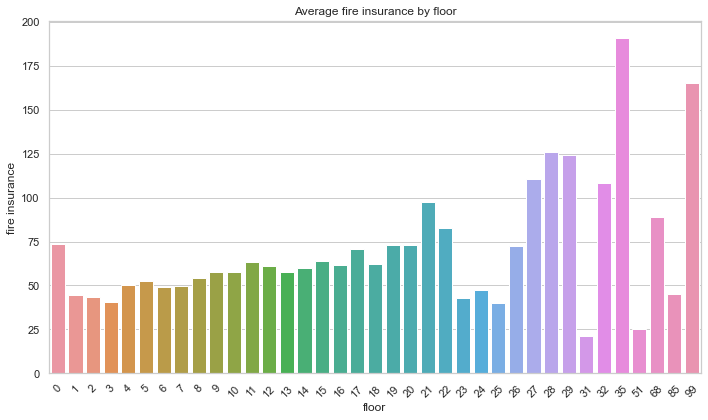

'Из этого анализа можно сделать вывод, что в среднем стоимость страхования от пожара увеличивается с увеличением этажа, но стоит заметить, что средняя стоимость страхования от пожара для объектов на 0,23,24,25,31,51 этажах показывают отклонения от нормы. Однако, такие результаты могут быть обусловлены разными факторами, такими как особенности конкретных данных, выбросы, наличие других переменных, влияющих на стоимость страхования, и так далее.'

In [78]:
grouped_data = pd_data.groupby('floor')['fire insurance'].mean()
print(grouped_data)

sns.set(style='whitegrid')
sns.set_palette("cubehelix")
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.xlabel('floor')
plt.ylabel('fire insurance')
plt.title('Average fire insurance by floor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

'''Из этого анализа можно сделать вывод, что в среднем стоимость страхования от пожара увеличивается с увеличением этажа, но стоит заметить, что средняя стоимость страхования от пожара для объектов на 0,23,24,25,31,51 этажах показывают отклонения от нормы. Однако, такие результаты могут быть обусловлены разными факторами, такими как особенности конкретных данных, выбросы, наличие других переменных, влияющих на стоимость страхования, и так далее.'''

'Наблюдается уменьшение средней стоимости ассоциаций домовладельцев при увеличении количества комнат до значения больше 5, это может быть результатом нескольких возможных факторов. Например, объекты недвижимости с большим количеством комнат могут быть более старыми, и что более крупные объекты могут потреблять больше ресурсов, а также большие объекты недвижимости могут иметь дополнительные удобства, такие как бассейн, сад, и т.п.'

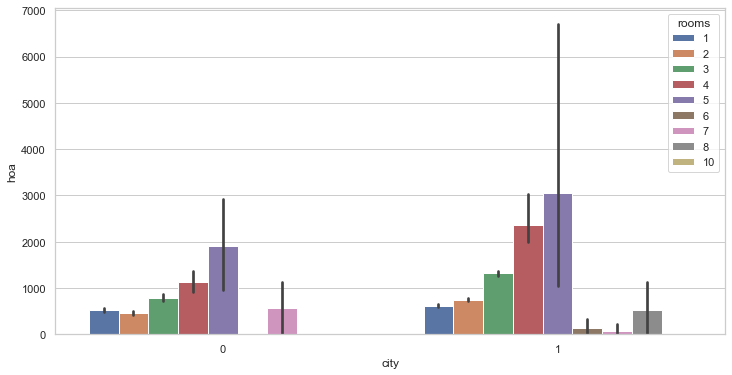

In [83]:
plt.figure(figsize=(12,6))
sns.set_palette("deep")
sns.barplot(x='city', y='hoa', hue='rooms', data=pd_data);

'''Наблюдается уменьшение средней стоимости ассоциаций домовладельцев при увеличении количества комнат до значения больше 5, это может быть результатом нескольких возможных факторов. Например, объекты недвижимости с большим количеством комнат могут быть более старыми, и что более крупные объекты могут потреблять больше ресурсов, а также большие объекты недвижимости могут иметь дополнительные удобства, такие как бассейн, сад, и т.п.'''

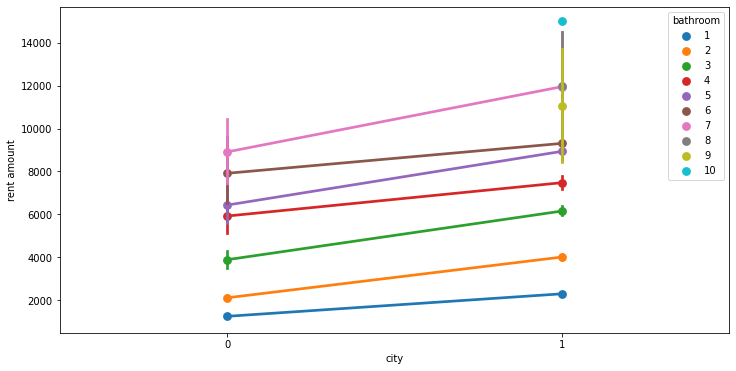

In [30]:
plt.figure(figsize=(12,6))
sns.pointplot(x='city', y='rent amount', hue='bathroom', data=pd_data);

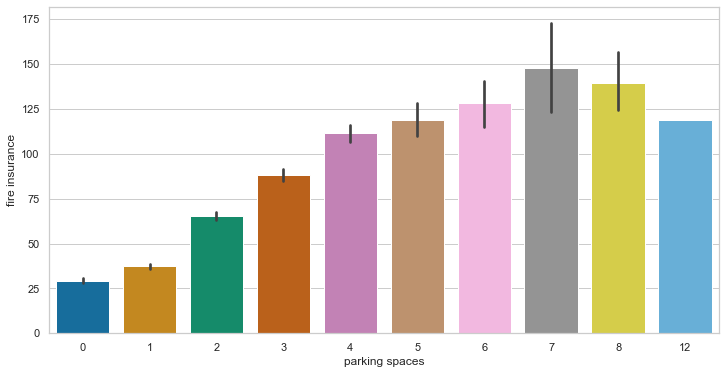

In [90]:
plt.figure(figsize=(12,6))
sns.set(style='whitegrid')
sns.set_palette("colorblind")
sns.barplot(x='parking spaces', y='fire insurance', data=pd_data);

'Cредняя стоимость аренды немного выше у недвижимости с мебелью. Это может быть связано с дополнительными удобствами, услугами или качеством жилья. График для недвижимости без мебели имеет большую ширину, это может указывать на большую изменчивость(разброс) в стоимости аренды для недвижимости без мебели. Шляпа у недвижимости без мебели значительно длиннее, может указывать на наличие выбросов. Стоимость аренды в этой категории может иметь большую изменчивость и может включать объекты с выдающимися характеристиками. В целом, анализ графика подсказывает, что более высокая стоимость аренды у недвижимости без мебели, а также большая изменчивость этой стоимости.'

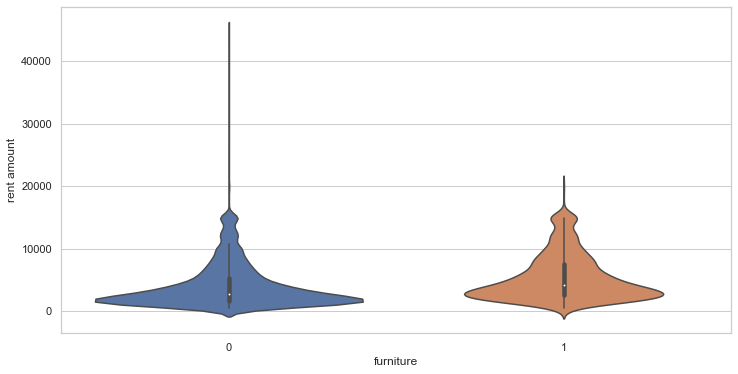

In [95]:
plt.figure(figsize=(12,6))
sns.set(style='whitegrid')
sns.set_palette("deep")
sns.violinplot(x ='furniture', y= 'rent amount', data=pd_data);
'''Cредняя стоимость аренды немного выше у недвижимости без мебели. Это может быть связано с дополнительными удобствами, услугами или качеством жилья. График для недвижимости без мебели имеет большую ширину, это может указывать на большую изменчивость(разброс) в стоимости аренды для недвижимости без мебели. Шляпа у недвижимости без мебели значительно длиннее, может указывать на наличие выбросов. Стоимость аренды в этой категории может иметь большую изменчивость и может включать объекты с выдающимися характеристиками. В целом, анализ графика подсказывает, что более высокая стоимость аренды у недвижимости без мебели, а также большая изменчивость этой стоимости.'''